# IMPORTS

## Libraries

In [1]:
import warnings

import numpy  as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display      import Image
from IPython.core.display import HTML


warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
dfRaw = pd.read_feather('00-Data/FeatherData/df01.feather')

In [3]:
dfRaw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,True,True,101348.88,True
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,True,False,113931.57,True
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,False,False,93826.63,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False


## Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set() 

In [5]:
jupyter_settings()  

Populating the interactive namespace from numpy and matplotlib


## Final Hypothesis List
---
> - H01 - Men usually have more churn
> - H02 - Women usually buy more products
> - H03 - Younger clients are less loyal and more likely to leave a bank
> - H04 - Clients with higher estimated wages have higher Churn Rate
> - H05 - Countries of Latin origin have higher number of churn
> - H06 - Active members have less churn
> - H07 - Along the years Churn tends to be lower
> - H08 - Customers with Credit Cards tend to stay at the bank
> - H09 - Customers with higher balance remain at the bank

# EXPLORATORY DATA ANALYSIS

In [6]:
df03 = dfRaw.copy()

## Response Variable

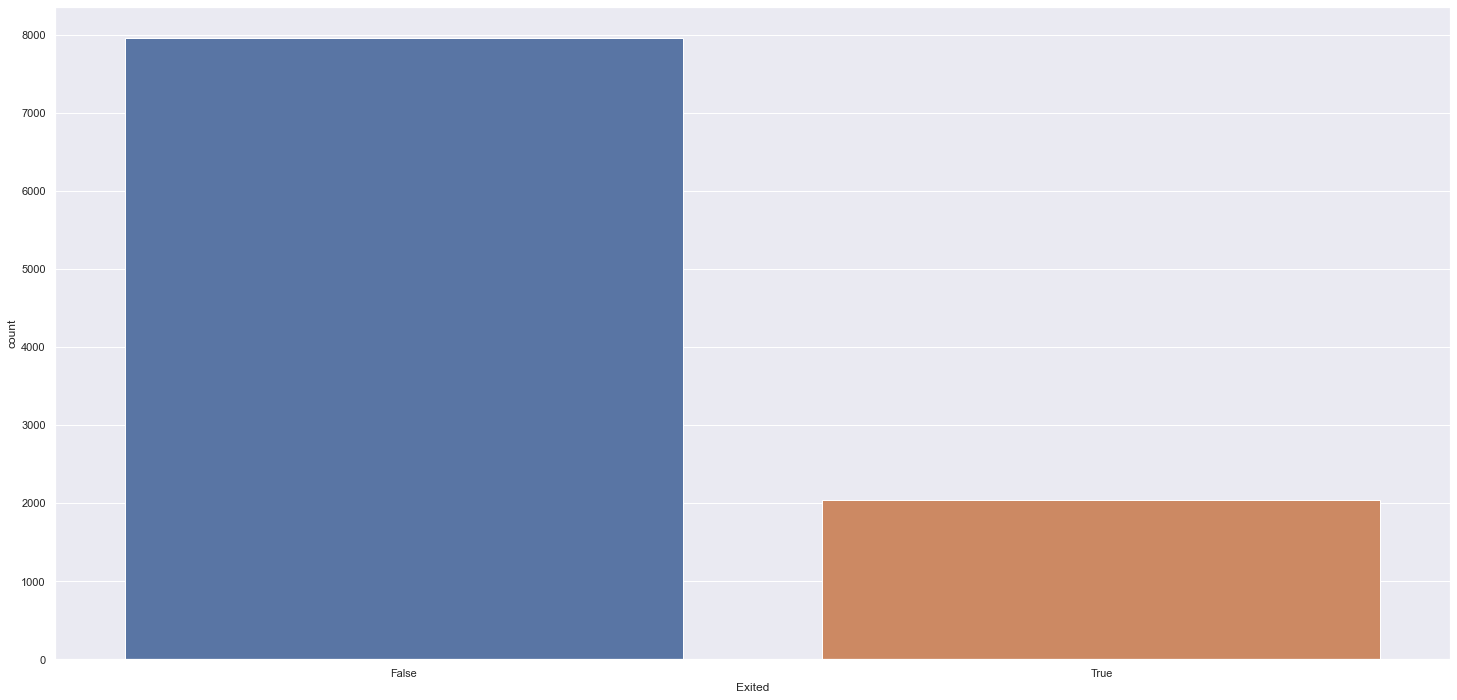

In [7]:
sns.countplot(x='Exited', data=df03);

---
> - Conclusion: **Disbalanced Dataset** 
---

## Univariate Analysis

### Numerical Attributes

In [19]:
# Numerical Attributes
numAttributes = df03.select_dtypes(include=['int64', 'float64'])
NotNumerial = ['RowNumber', 'CustomerId']
numAttributes = numAttributes[numAttributes.columns[~numAttributes.columns.isin(NotNumerial)]]

#Categorical Attributes
catAttributes = df03.select_dtypes(include=['category'])

#Boolean Attributes
boolAttributes = df03.select_dtypes(include=['bool'])

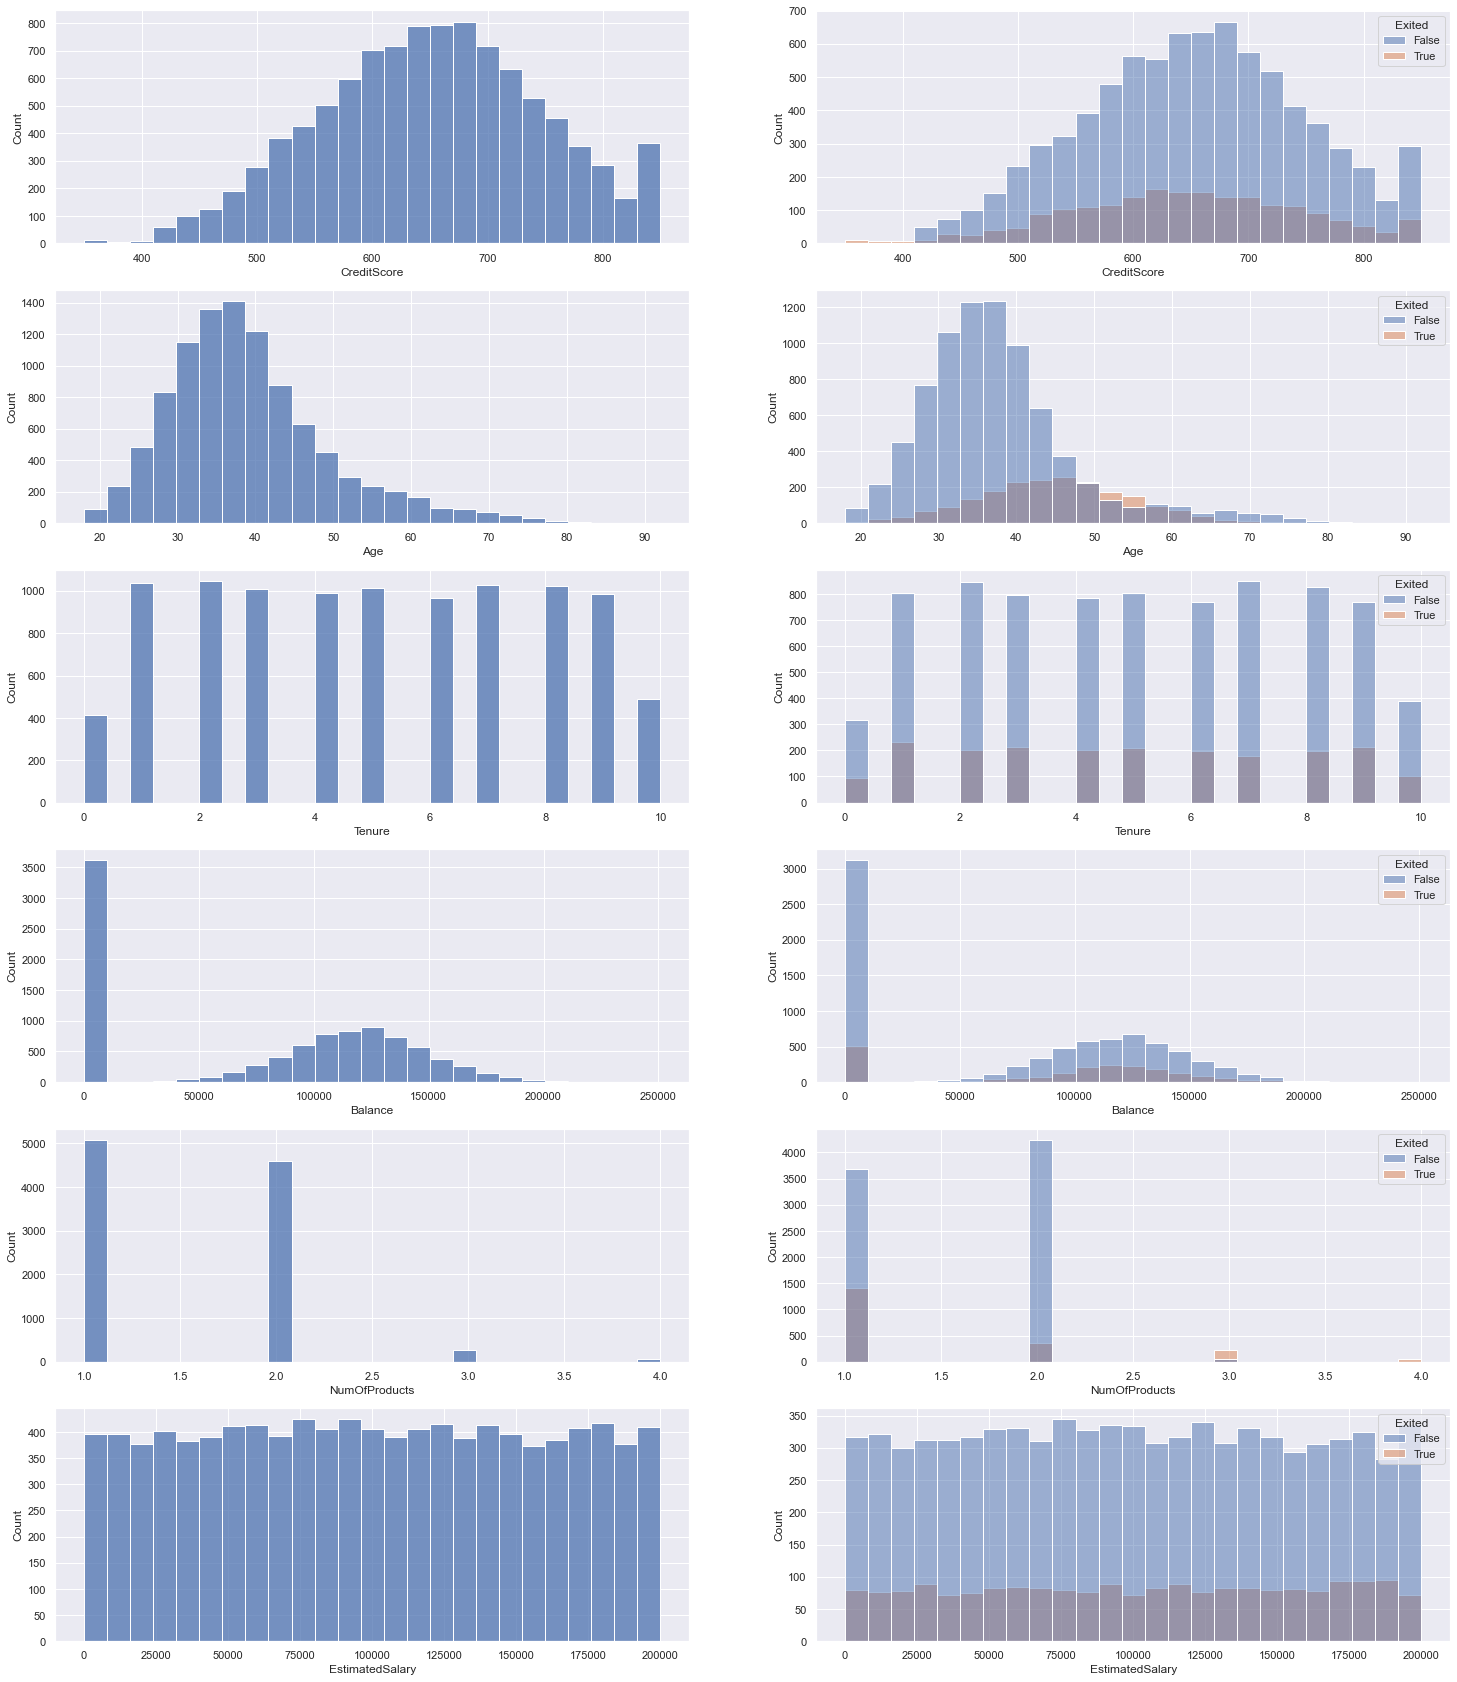

In [27]:
count = 1
attributesToInspect = numAttributes
rows= len(attributesToInspect)
plt.figure(figsize=(25,5*rows))
for i in attributesToInspect:
    plt.subplot(rows, 2, count)
    sns.histplot(x=i, bins=25, data=df03)
    count += 1
    
    plt.subplot(rows, 2, count)
    sns.histplot(x=i, bins=25, hue='Exited', data=df03)
    count += 1
plt.show()

### Categorical Attributes

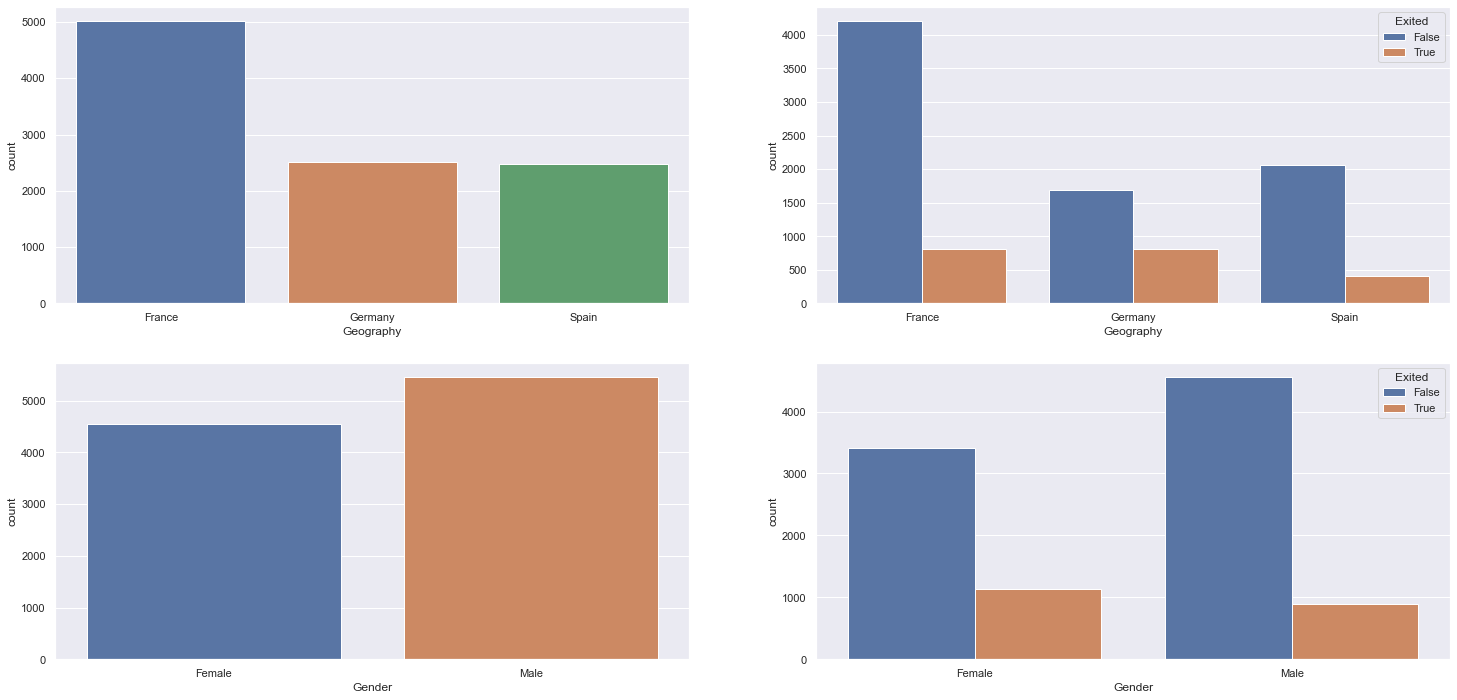

In [30]:
count = 1
attributesToInspect = ['Geography', 'Gender']
rows= len(attributesToInspect)
for i in attributesToInspect:
    plt.subplot(rows, 2, count)
    sns.countplot(x=i, data=df03)
    count += 1
    
    plt.subplot(rows, 2, count)
    sns.countplot(x=i, hue='Exited', data=df03)
    count += 1
plt.show()

In [33]:
dfBool = pd.DataFrame(boolAttributes.apply(lambda x: x.sum())).rename(columns={0:"Yes"})
dfBool['No'] = dfBool['Yes'].apply(lambda row: df03.shape[0] - row)
#dfBool.head()



,Yes,No
HasCrCard,7055,2945
IsActiveMember,5151,4849
Exited,2037,7963


### H01 - Men usually have more churn
---
> - Conclusion: **FALSE** 
>> **WOMEN** have more churn

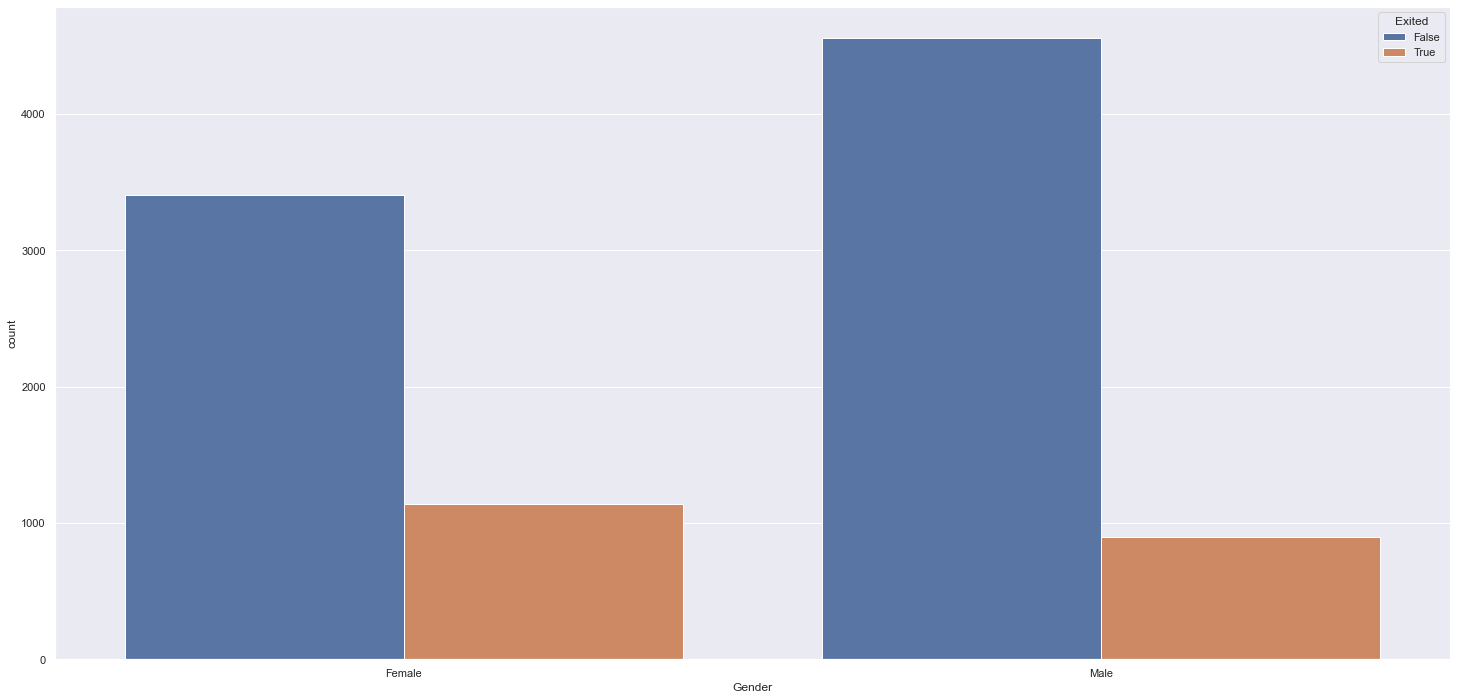

In [8]:
sns.countplot(x='Gender', hue='Exited', data=df03)
plt.show()

### H02 - Women usually buy more products
---
> - Conclusion: **FALSE** 
>> **MEN** usually buy more products

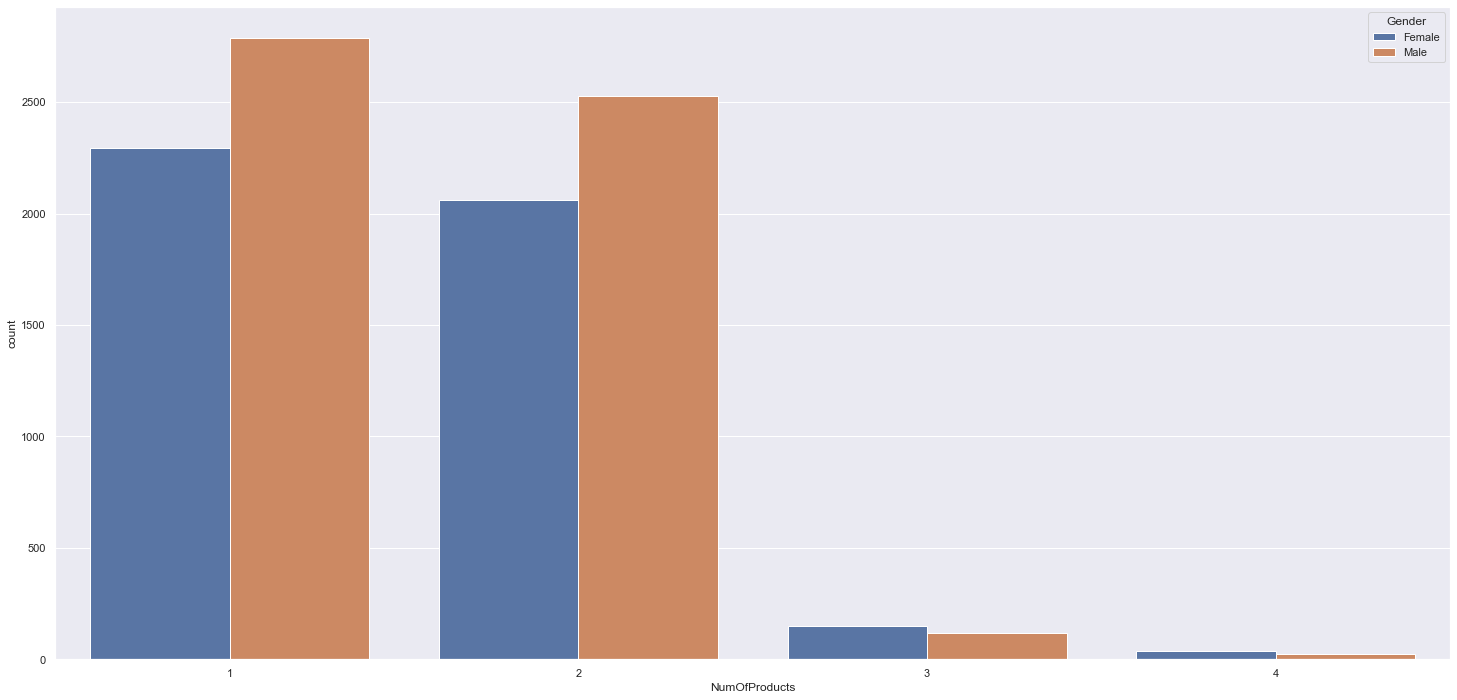

In [9]:
sns.countplot(x='NumOfProducts', hue='Gender', data=df03);

### H03 - Younger clients are less loyal and more likely to leave a bank
---
> - Conclusion: **FALSE** 
>> Younger clients are **MORE** loyal and more likely to leave a bank

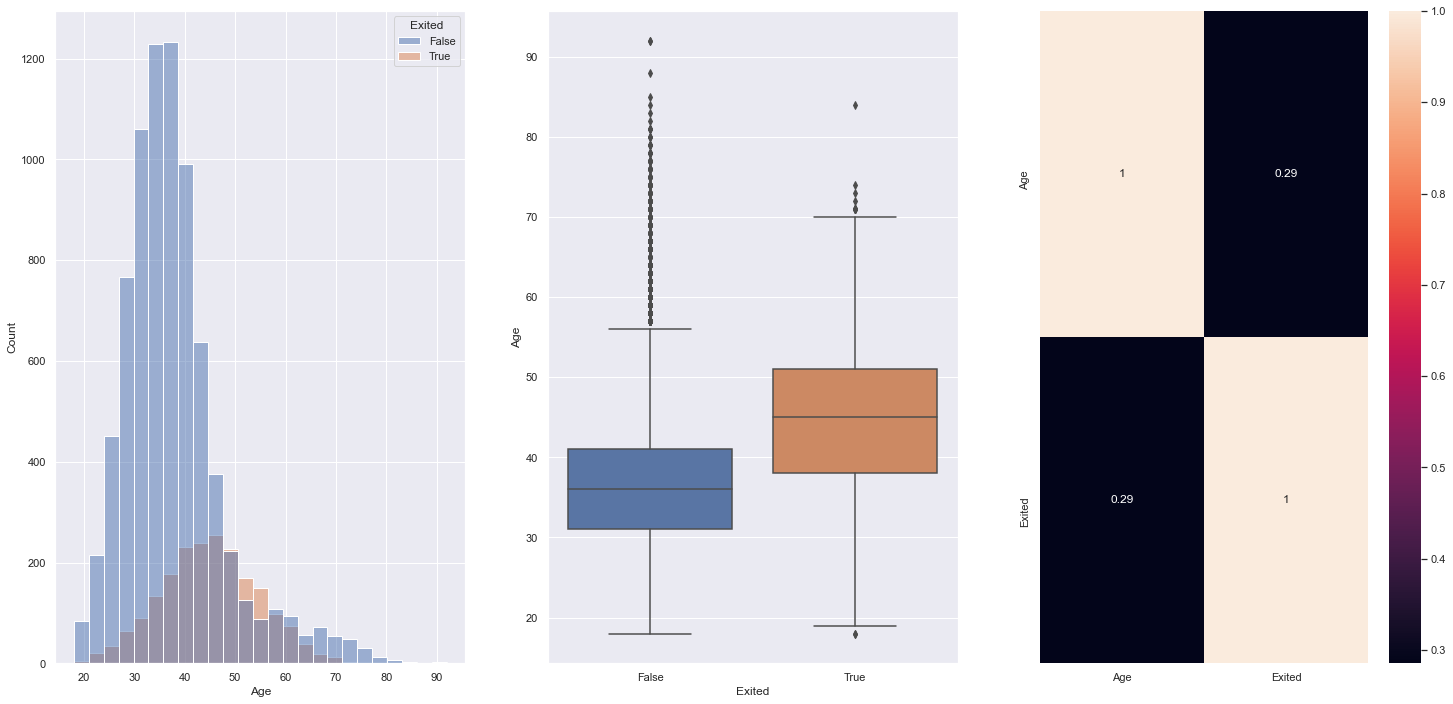

In [10]:
aux01 = df03[['Age', 'Exited']]

plt.subplot(1,3,1)
sns.histplot(x='Age', bins=25, hue='Exited', data=aux01);

plt.subplot(1,3,2)
sns.boxplot(x='Exited', y='Age', data=aux01);

plt.subplot(1,3,3)
sns.heatmap(aux01.corr(method='pearson'),annot=True);

### H04 - Clients with higher estimated wages have higher Churn Rate
---
> - Conclusion: **INCONCLUSIVE** 
>> Clients with higher estimated wages have **almost the same** Churn Rate

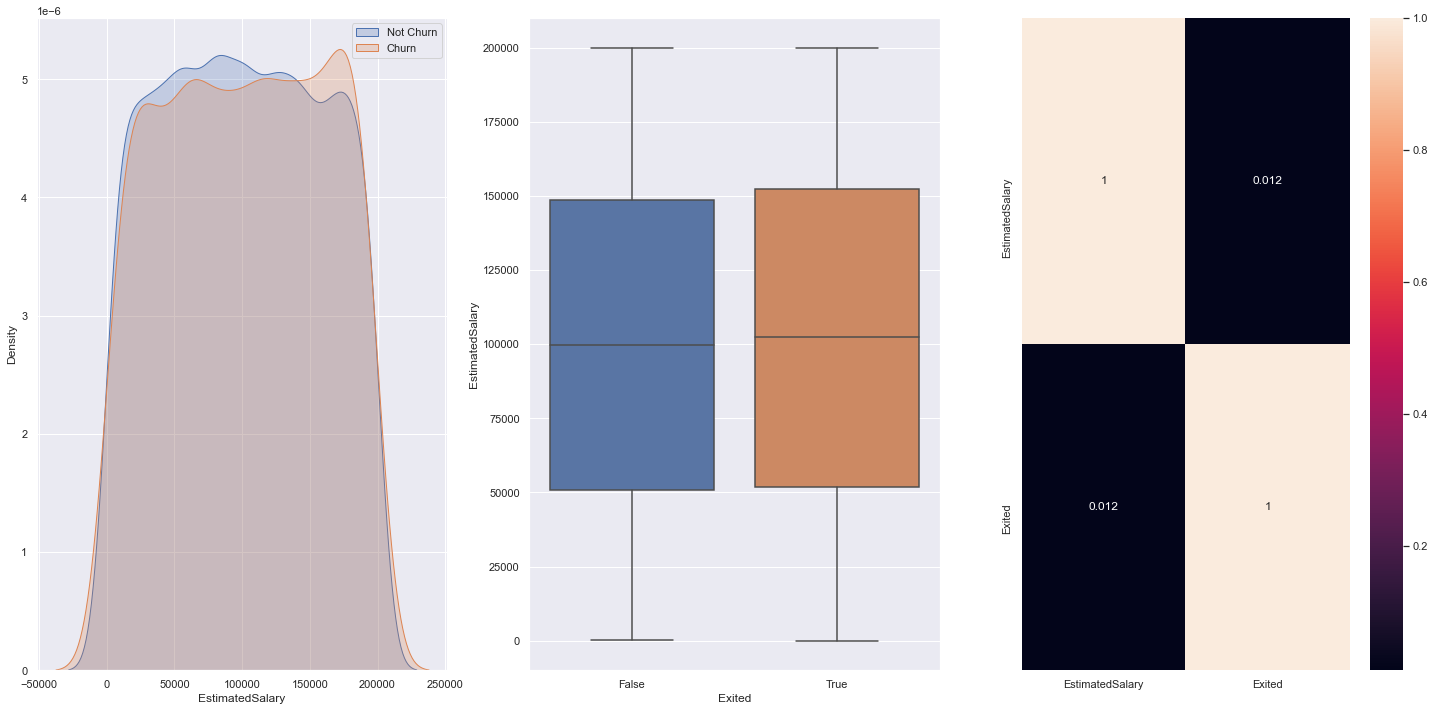

In [11]:
aux01 = df03[['EstimatedSalary', 'Exited']]

plt.subplot(1,3,1)
sns.kdeplot(aux01[aux01['Exited'] == False]['EstimatedSalary'], label='Not Churn', shade=True);
sns.kdeplot(aux01[aux01['Exited'] == True]['EstimatedSalary'], label='Churn', shade=True);
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x="Exited", y="EstimatedSalary", data=aux01);

plt.subplot(1,3,3)
sns.heatmap(aux01.corr(method='pearson'),annot=True);

### H05 - Countries of Latin origin have higher number of churn
---
> - Conclusion: **FALSE** 
>> Countries of **Anglo-Saxons** origin have higher number of churn

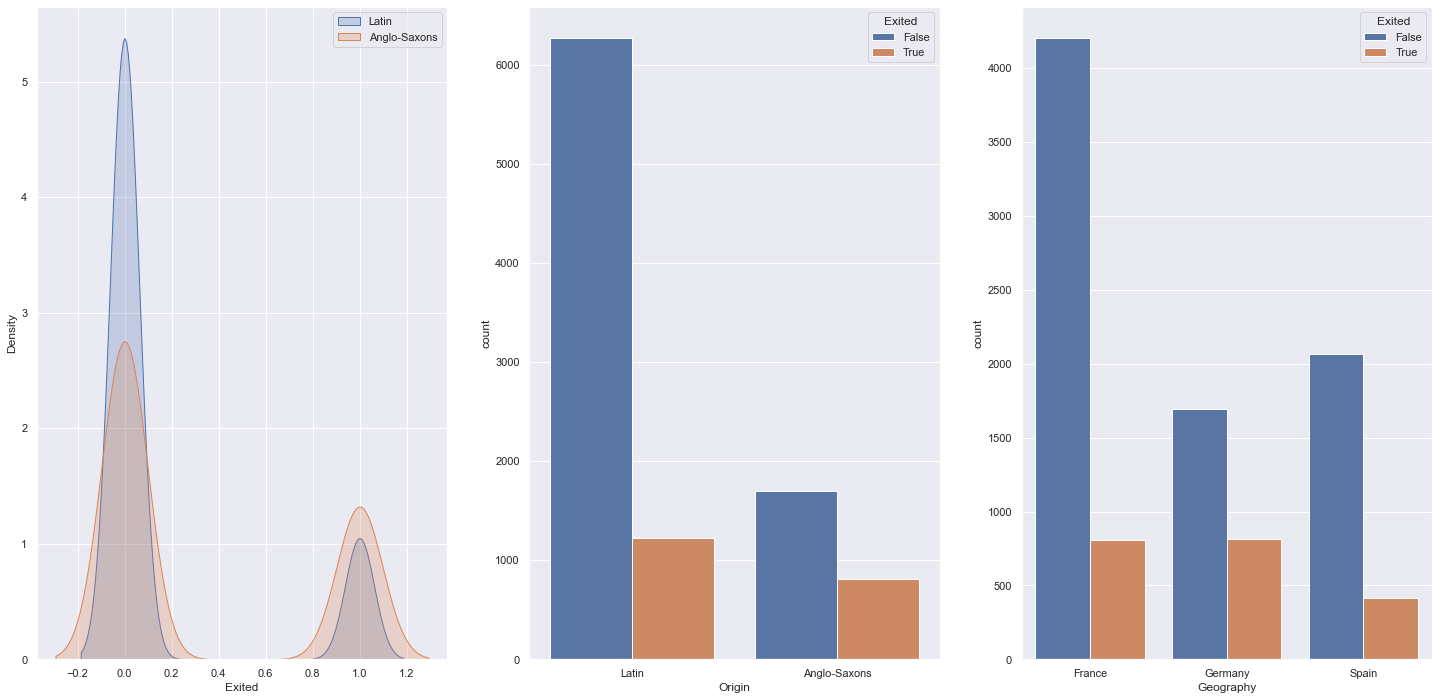

In [12]:
originMap = {
    'France': 'Latin',
    'Spain': 'Latin',
    'Germany': 'Anglo-Saxons'
}

df03['Origin'] = df03['Geography'].map(originMap)

aux01 = df03[['Origin', 'Exited']]

plt.subplot(1,3,1)
sns.kdeplot(aux01[aux01['Origin'] == 'Latin']['Exited'], label='Latin', shade=True);
sns.kdeplot(aux01[aux01['Origin'] == 'Anglo-Saxons']['Exited'], label='Anglo-Saxons', shade=True);
plt.legend()

plt.subplot(1,3,2)
sns.countplot(x='Origin', hue='Exited', data=aux01);

plt.subplot(1,3,3)
sns.countplot(x='Geography', hue='Exited', data=df03);

### H06 - Active members have less churn
---
> - Conclusion: **TRUE** 
>> Active members have less churn

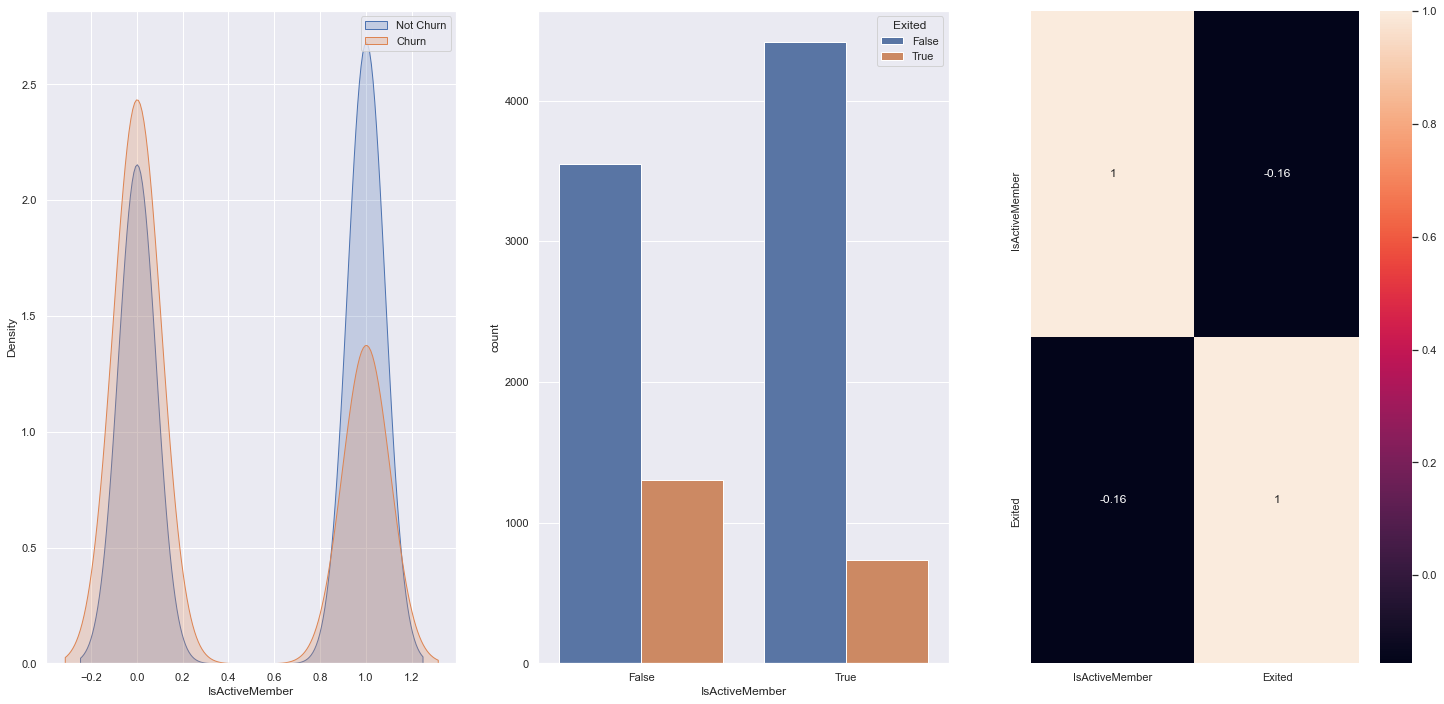

In [13]:
aux01 = df03[['IsActiveMember', 'Exited']]

plt.subplot(1,3,1)
sns.kdeplot(aux01[aux01['Exited'] == False]['IsActiveMember'], label='Not Churn', shade=True);
sns.kdeplot(aux01[aux01['Exited'] == True]['IsActiveMember'], label='Churn', shade=True);
plt.legend()

plt.subplot(1,3,2)
sns.countplot(x='IsActiveMember', hue='Exited', data=df03);

plt.subplot(1,3,3)
sns.heatmap(aux01.corr(method='pearson'),annot=True);

### H07 - Along the years Churn tends to be lower
---
> - Conclusion: **FALSE** 
>> Along the years Churn does not reduce

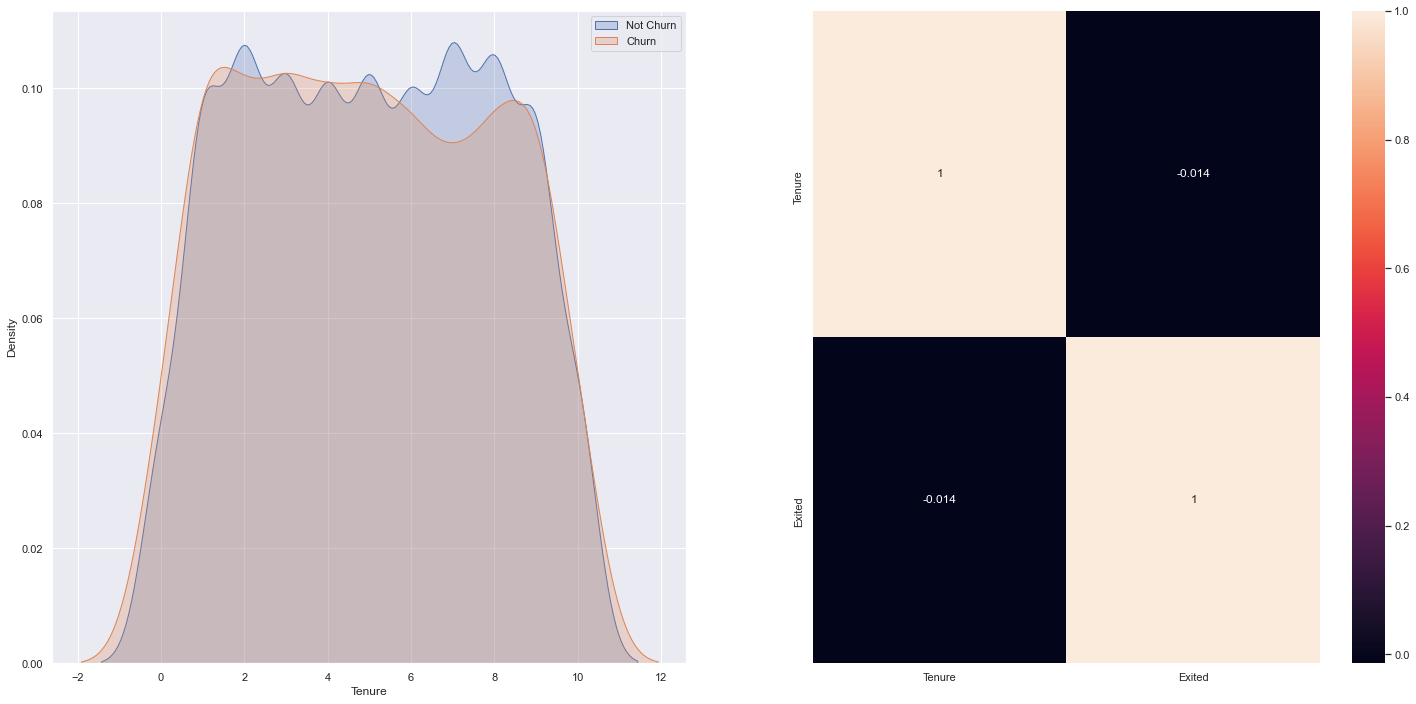

In [14]:
aux01 = df03[['Tenure', 'Exited']]

plt.subplot(1,2,1)
sns.kdeplot(aux01[aux01['Exited'] == False]['Tenure'], label='Not Churn', shade=True);
sns.kdeplot(aux01[aux01['Exited'] == True]['Tenure'], label='Churn', shade=True);
plt.legend()

plt.subplot(1,2,2)
sns.heatmap(aux01.corr(method='pearson'),annot=True);

### H08 - Customers with Credit Cards tend to stay at the bank
---
> - Conclusion: **FALSE** 
>> Customers with Credit Cards have a churn rate similar to customers without credit cards

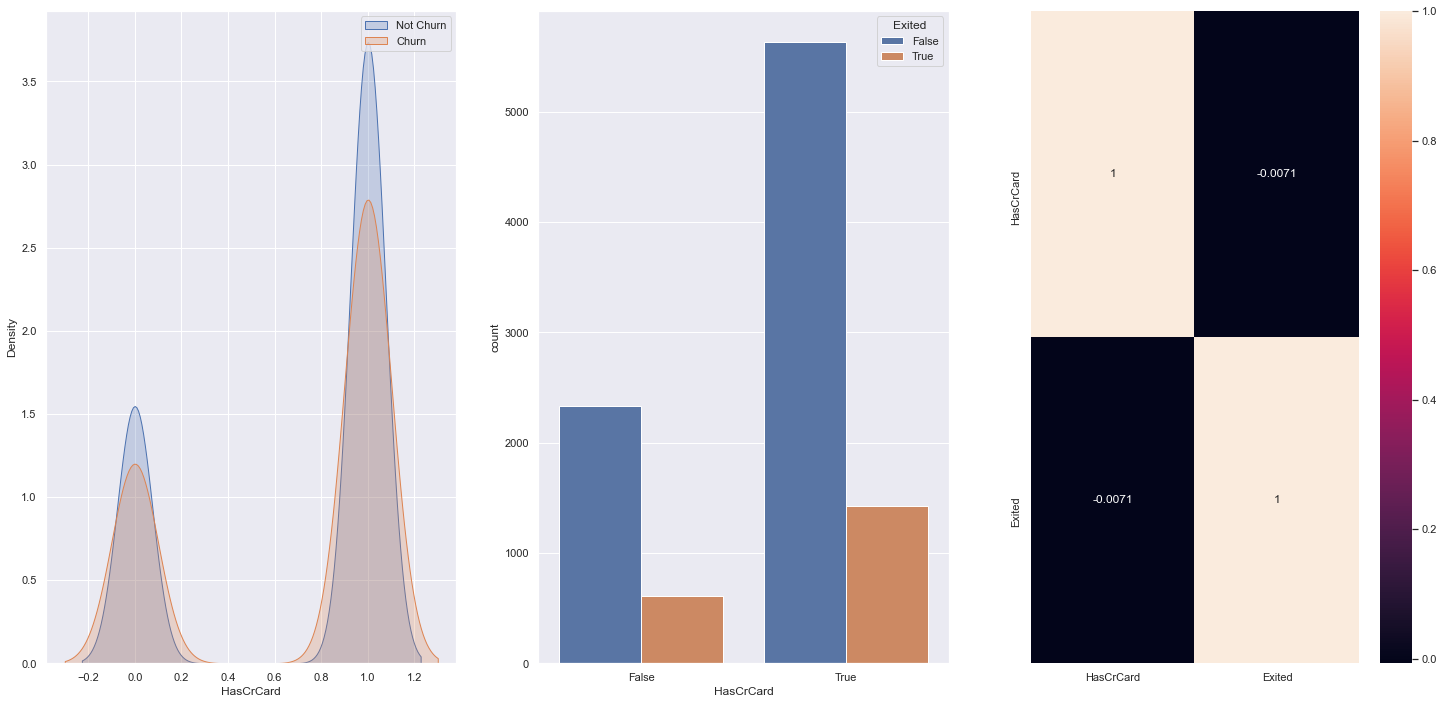

In [15]:
aux01 = df03[['HasCrCard', 'Exited']]

plt.subplot(1,3,1)
sns.kdeplot(aux01[aux01['Exited'] == False]['HasCrCard'], label='Not Churn', shade=True);
sns.kdeplot(aux01[aux01['Exited'] == True]['HasCrCard'], label='Churn', shade=True);
plt.legend()

plt.subplot(1,3,2)
sns.countplot(x='HasCrCard', hue='Exited', data=aux01);

plt.subplot(1,3,3)
sns.heatmap(aux01.corr(method='pearson'),annot=True);

### H09 - Customers with higher balance remain at the bank
---
> - Conclusion: **Trur** 
>> Customers with higher balance remain at the bank

No handles with labels found to put in legend.


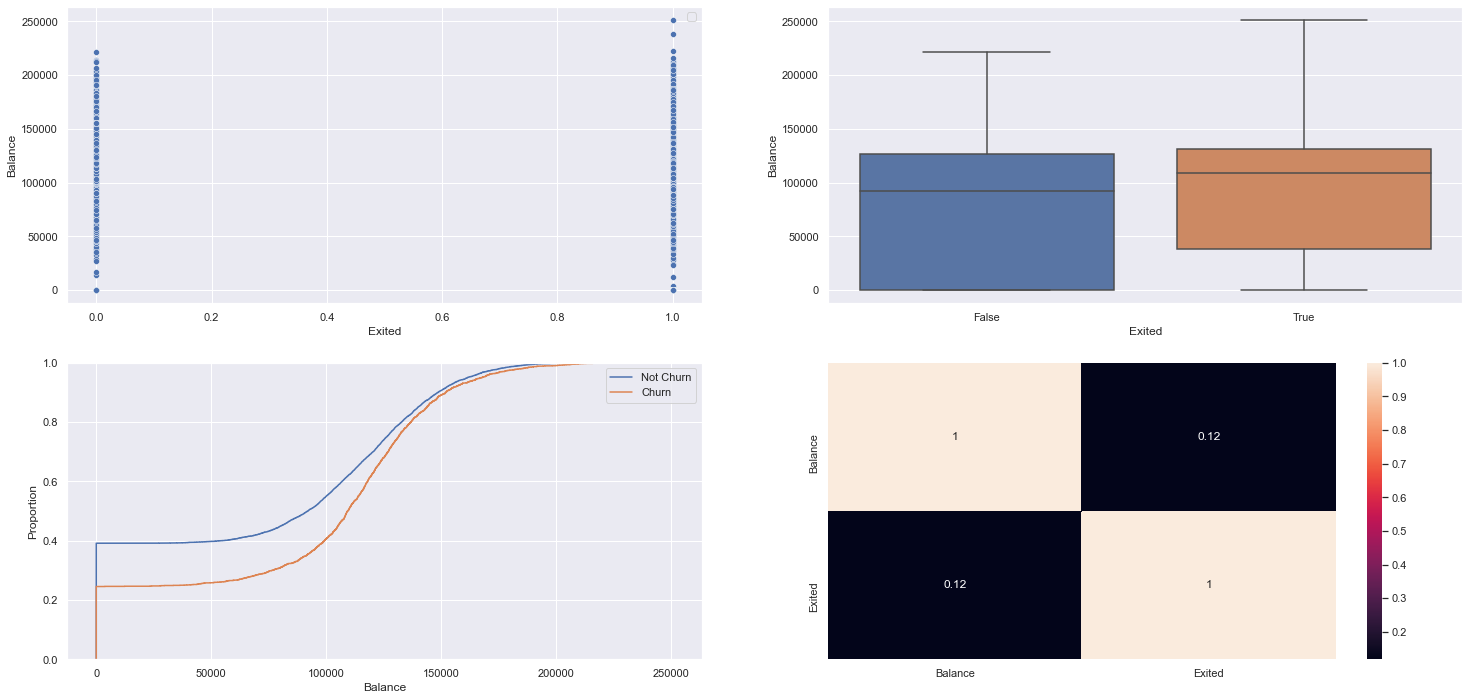

In [16]:
aux01 = df03[['Balance', 'Exited']]

plt.subplot(2,2,1)
sns.scatterplot(y='Balance', x='Exited', data=aux01);
plt.legend()

plt.subplot(2,2,2)
sns.boxplot(y='Balance', x='Exited', data=aux01);

plt.subplot(2,2,3)
sns.ecdfplot(data=aux01[aux01['Exited'] == False], x="Balance", label='Not Churn');
sns.ecdfplot(data=aux01[aux01['Exited'] == True], x="Balance", label='Churn');
plt.legend()

plt.subplot(2,2,4)
sns.heatmap(aux01.corr(method='pearson'),annot=True);